In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

In [ ]:
customers = pd.read_csv('customers.csv')
interactions = pd.read_csv('interactions.csv')
transactions = pd.read_csv('transactions.csv')

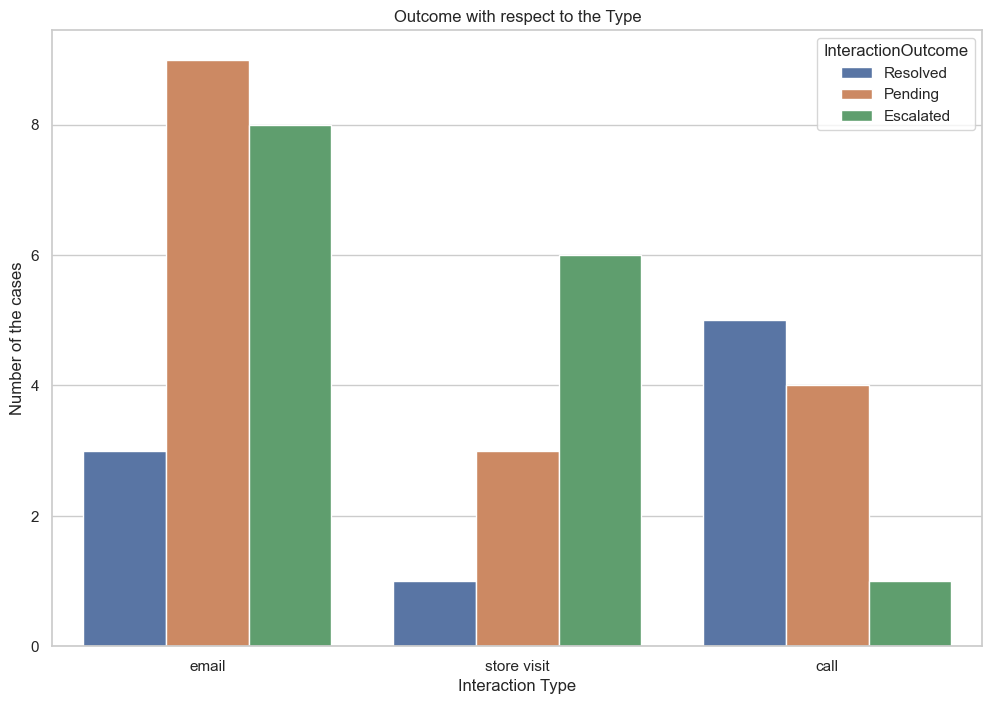

In [ ]:
plt.figure(figsize=(12, 8))
plt.title('Outcome with respect to the Type')
plt.xlabel('Interaction Type')
plt.ylabel('Number of the cases')
ax = sns.countplot(x='InteractionType', hue='InteractionOutcome', data=interactions)
plt.show()

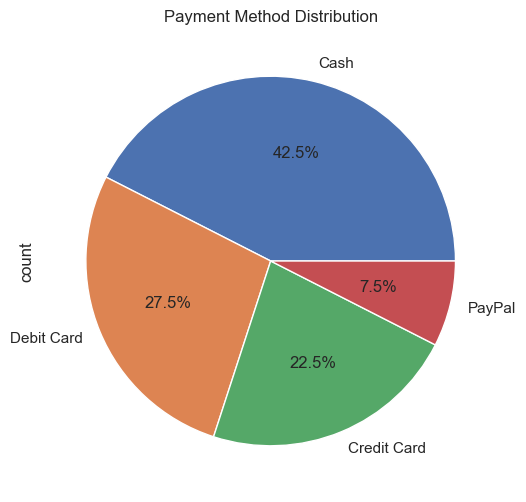

In [ ]:
# Payment method distribution (pie or bar chart)
plt.figure(figsize=(6, 6))
transactions['PaymentMethod'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Payment Method Distribution')
plt.show()

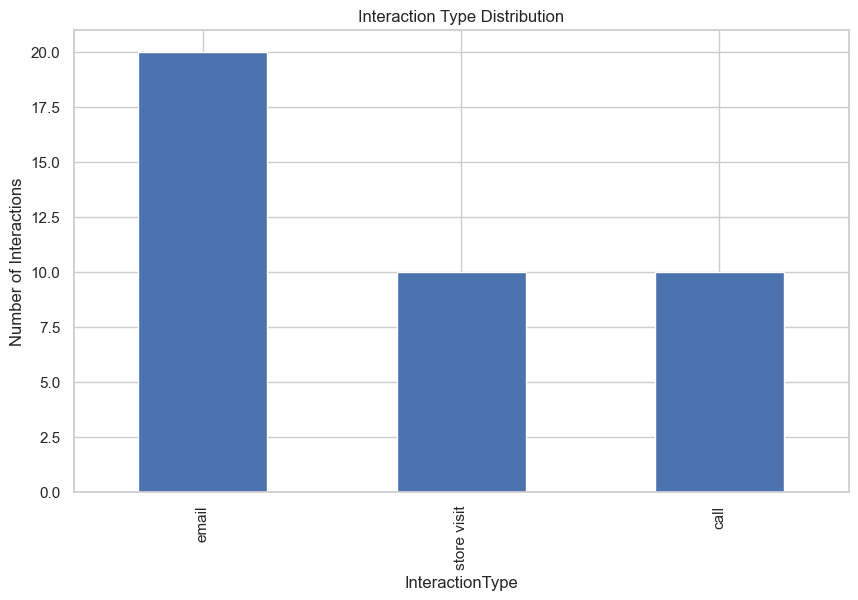

In [ ]:
# Interaction type distribution (bar plot)
interaction_type = interactions['InteractionType'].value_counts()
plt.figure(figsize=(10, 6))
interaction_type.plot(kind='bar')
plt.title('Interaction Type Distribution')
plt.ylabel('Number of Interactions')
plt.show()

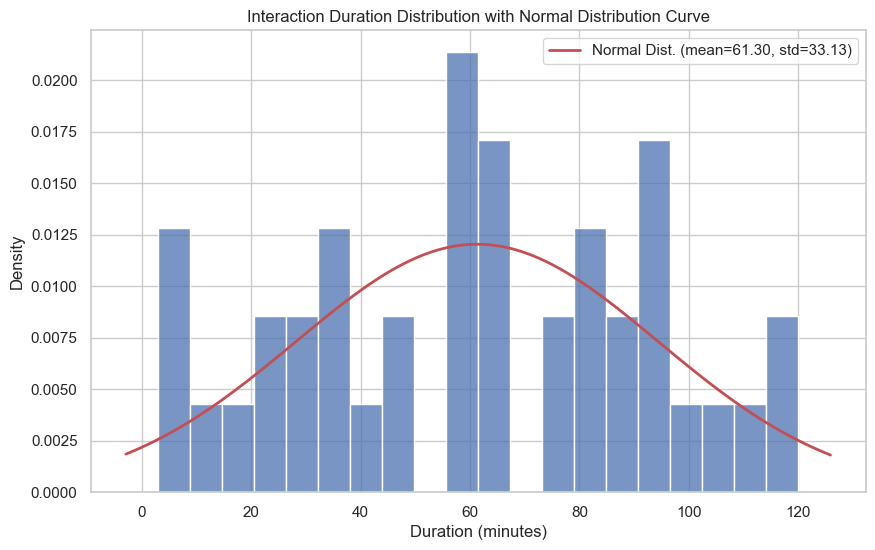

In [ ]:
import numpy as np
from scipy.stats import norm

# Interaction duration analysis (histogram)
plt.figure(figsize=(10, 6))

# Plotting the histogram
sns.histplot(interactions['InteractionDuration'], bins=20, kde=False, stat='density')

# Fit a normal distribution to the data
mean_duration = interactions['InteractionDuration'].mean()
std_duration = interactions['InteractionDuration'].std()

# Generate values for the normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_duration, std_duration)

# Plot the normal distribution curve
plt.plot(x, p, 'r', linewidth=2, label=f'Normal Dist. (mean={mean_duration:.2f}, std={std_duration:.2f})')

# Add titles and labels
plt.title('Interaction Duration Distribution with Normal Distribution Curve')
plt.xlabel('Duration (minutes)')
plt.ylabel('Density')
plt.legend()

# Show the plot
plt.show()


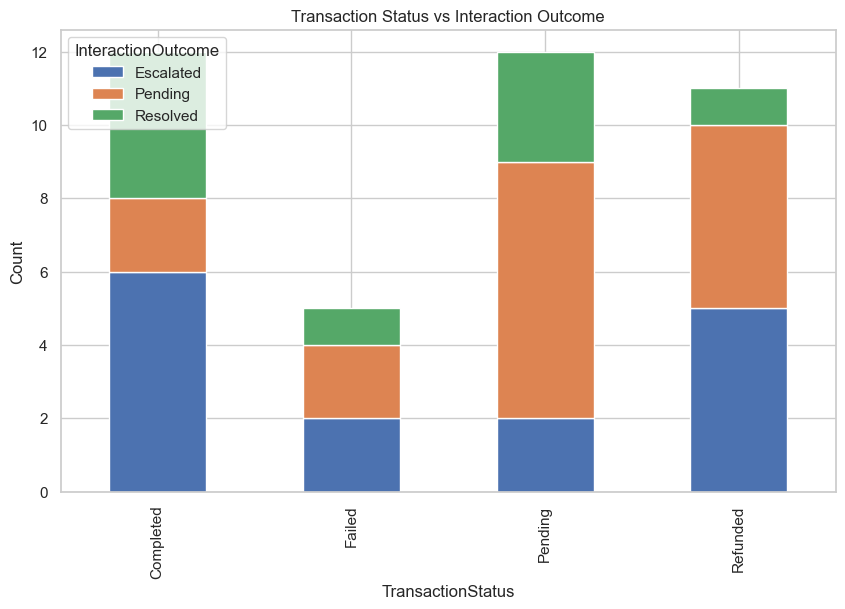

In [ ]:
# Transaction status vs. interaction outcome (grouped bar chart)
status_vs_outcome = pd.crosstab(transactions['TransactionStatus'], interactions['InteractionOutcome'])
status_vs_outcome.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Transaction Status vs Interaction Outcome')
plt.ylabel('Count')
plt.show()

In [ ]:
# Location-based spending and interaction rates (heatmap)
location_spending = transactions.groupby('Location')['AmountSpent'].sum()
location_interactions = interactions.groupby('Location').size()
location_data = pd.concat([location_spending, location_interactions], axis=1).fillna(0)
location_data.columns = ['Total Spending', 'Total Interactions']
plt.figure(figsize=(10, 6))
sns.heatmap(location_data.T, annot=True, fmt=".0f", cmap="Blues")
plt.title('Location-based Spending and Interaction Rates')
plt.show()

KeyError: 'Location'